<a href="https://colab.research.google.com/github/aaltmets/Masterthesis/blob/main/mergetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time

# data science imports
import math
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

Data is from June 2022 - January 2023. Keywords 'covid travel' 
Dataframe shape is 86150 

Currently I have removed duplicate tweets with dupliucate text and tweet ID. 

I created histograms 

In [ ]:
df = pd.read_csv('filename.csv', index_col=False)

In [ ]:
df['tweet_id'] = df['tweet_id'].astype(int)

In [ ]:
df1 = pd.read_csv('file2.csv', index_col=False)

In [ ]:
df1['tweet_id'].fillna(0, inplace=True)

In [ ]:
df1['tweet_id'] = df1['tweet_id'].astype(int)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df2 = pd.read_csv('file3.csv')

In [ ]:
df3 = pd.read_csv('filename3.csv', index_col=False)

In [ ]:
df3['tweet_id'].fillna(0, inplace=True)
df3['tweet_id'] = df3['tweet_id'].astype(int)

In [ ]:
df4 = pd.read_csv('file5.csv', index_col=False)

In [ ]:
df4['tweet_id'].fillna(0, inplace=True)
df4['tweet_id'] = df4['tweet_id'].astype(int)

In [ ]:
df5 = pd.read_csv('file6.csv', index_col=False)

In [ ]:
df6 = pd.read_csv('file7.csv', index_col=False)

<ipython-input-28-81316f59b780>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,12,14,15,16,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv('covidtravel.csv', index_col=False)


In [ ]:
df6['tweet_id'].fillna(0, inplace=True)
df6['tweet_id'] = df6['tweet_id'].astype(int)

In [ ]:
frames = [df, df1, df2, df3, df4, df5, df6]
result = pd.concat(frames)

In [ ]:
result.shape

(237033, 24)

In [ ]:
result = result.drop_duplicates(subset=['tweet_id'])

In [ ]:
result.shape

(87117, 24)

In [ ]:
df7 = pd.read_excel('virus.xlsx')

In [ ]:
df7['tweet_id'].fillna(0, inplace=True)
df7['tweet_id'] = df7['tweet_id'].astype(int)

In [ ]:
df8 = pd.read_excel('covidtravelone.xlsx')

In [ ]:
df8['tweet_id'].fillna(0, inplace=True)
df8['tweet_id'] = df8['tweet_id'].astype(int)

In [ ]:
df9 = pd.read_excel('coronavirustravel.xlsx')

In [ ]:
df9['tweet_id'].fillna(0, inplace=True)
df9['tweet_id'] = df9['tweet_id'].astype(int)

In [ ]:
frames = [result, df7, df8, df9]
result = pd.concat(frames)

In [ ]:
result.shape

(132265, 25)

In [ ]:
result = result.drop_duplicates(subset=['tweet_id'])

In [ ]:
result.shape

(127059, 25)

In [ ]:
result.to_csv('all_data.csv')

In [ ]:
result['retweets'] = result['retweets'].fillna(0)

In [ ]:
result['replies'] = result['replies'].fillna(0)
result['likes'] = result['likes'].fillna(0)

In [ ]:


result['retweets'] = result['retweets'].astype(int)


In [ ]:
result['replies'] = result['replies'].astype(int)

result['likes'] = result['likes'].astype(int)

(array([123179.,   1995.,    616.,    313.,    216.]),
 array([ 0.,  6., 12., 18., 24., 30.]),
 <BarContainer object of 5 artists>)

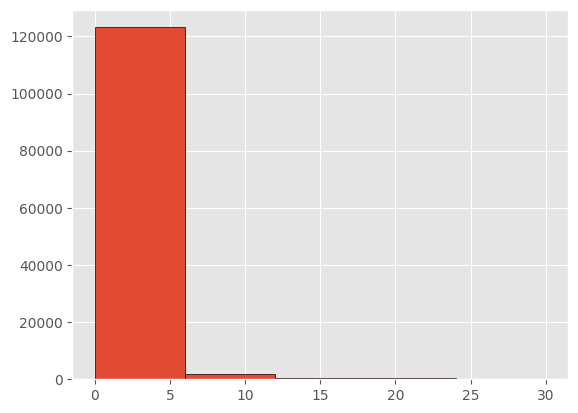

In [ ]:
plt.hist(result['retweets'], edgecolor='black', range=[0, 30], bins = 5)


(array([615., 359., 217., 173., 113.,  85.,  77.,  72.,  47.,  40.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <BarContainer object of 10 artists>)

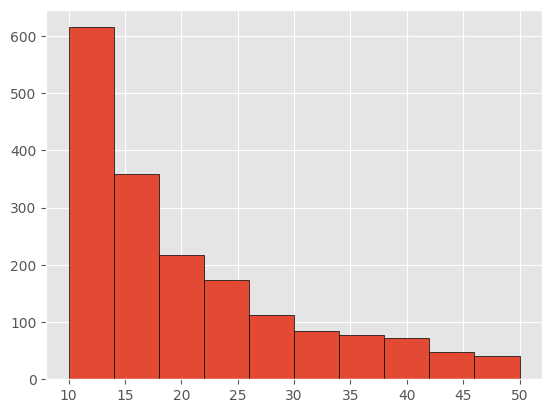

In [ ]:
plt.hist(result['retweets'], edgecolor='black', range=[10, 50], bins = 10)

In [ ]:
pd.options.display.max_colwidth = 400
retweets = result[(result['retweets'] == 50)]

(array([1.2294e+05, 2.5630e+03, 6.2400e+02, 2.4400e+02, 1.5300e+02,
        1.0000e+02, 8.4000e+01, 5.0000e+01]),
 array([ 0.  ,  3.75,  7.5 , 11.25, 15.  , 18.75, 22.5 , 26.25, 30.  ]),
 <BarContainer object of 8 artists>)

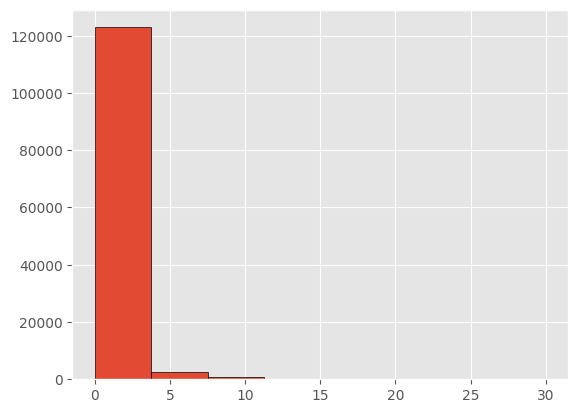

In [ ]:
plt.hist(result['replies'], edgecolor='black', range=[0, 30], bins = 8)

(array([409., 184., 119.,  91.,  53.,  35.,  29.,  27.,  22.,  31.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <BarContainer object of 10 artists>)

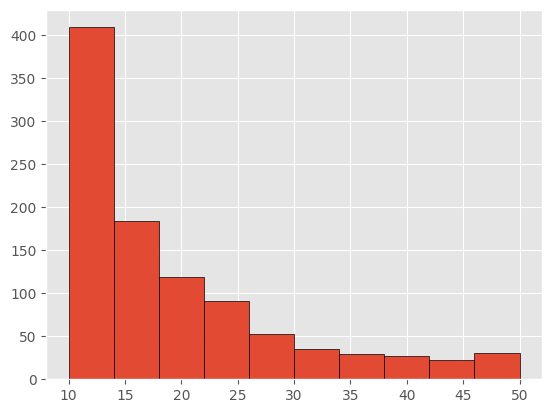

In [ ]:
plt.hist(result['replies'], edgecolor='black', range=[10, 50], bins = 10)

In [ ]:
pd.options.display.max_colwidth = 400 
replies = result[(result['replies'] == 50)]

(array([102930.,  10729.,   4139.,   1842.,   1481.,   1025.,    741.,
           533.]),
 array([ 0.  ,  3.75,  7.5 , 11.25, 15.  , 18.75, 22.5 , 26.25, 30.  ]),
 <BarContainer object of 8 artists>)

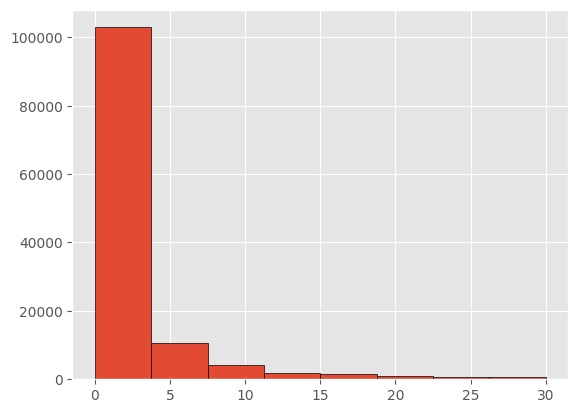

In [ ]:
plt.hist(result['likes'], edgecolor='black', range=[0, 30], bins = 8)

(array([2976., 1732., 1099.,  813.,  548.,  506.,  338.,  293.,  237.,
         237.]),
 array([10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.]),
 <BarContainer object of 10 artists>)

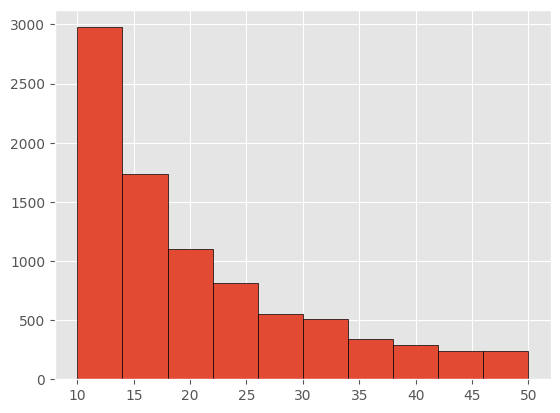

In [ ]:
plt.hist(result['likes'], edgecolor='black', range=[10, 50], bins = 10)

<Axes: ylabel='Frequency'>

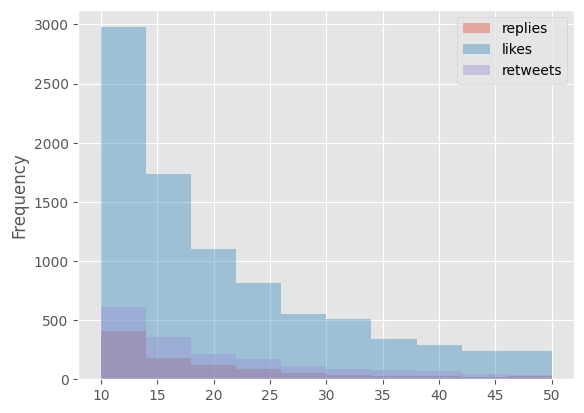

In [ ]:
result[["replies", "likes", "retweets"]].plot.hist(alpha=0.4, range = [10, 50])